In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
# import ASRE models
cur_dir = os.getcwd()
ASREp_dir = os.path.join(os.path.dirname(os.path.dirname(cur_dir)))
sys.path.append(ASREp_dir)
import ASREp.ground_deformation_models as gdm
import ASREp
import pandas as pd
from scipy import interpolate
from scipy.io import loadmat
np.set_printoptions(threshold=np.inf)

In [2]:
# Read the mesh file
input_dir = "./input"
mesh_file = os.path.join(input_dir, "burd_mat_20250901T162943.mat")
mesh_data = loadmat(mesh_file)
print(mesh_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'elem2nInter', 'interNodesXYZ', 'timberElemIndex', 'wholeElem2n', 'wholeNodesXYZ'])


In [3]:
wholeNodesXYZ = mesh_data['wholeNodesXYZ']  # (N, 3) array
min_z = np.min(wholeNodesXYZ[:, 2])
print(f"Minimum z value in the mesh: {min_z}")
groundNodeInd = np.where(wholeNodesXYZ[:, 2] == min_z)[0]  # indices of ground nodes
x = wholeNodesXYZ[groundNodeInd, 0]
y = wholeNodesXYZ[groundNodeInd, 1]
# z = wholeNodesXYZ[groundNodeInd, 2]
z = np.zeros_like(x)  # set z to zero for ground surface
vl = 1.65/100.0
d = 11.0
z0 = 23.0
ys = 200.0 # assume the tunnel has fully passed the building
yf = -200.0 # assume the tunnel start point is far away from the building
k = 0.57
delta = 0.3
u_x, u_y, u_z = gdm.ground_disp_Zhao_2023(x, y, z, vl, d, z0, ys, yf, k, delta)

Minimum z value in the mesh: -1.0


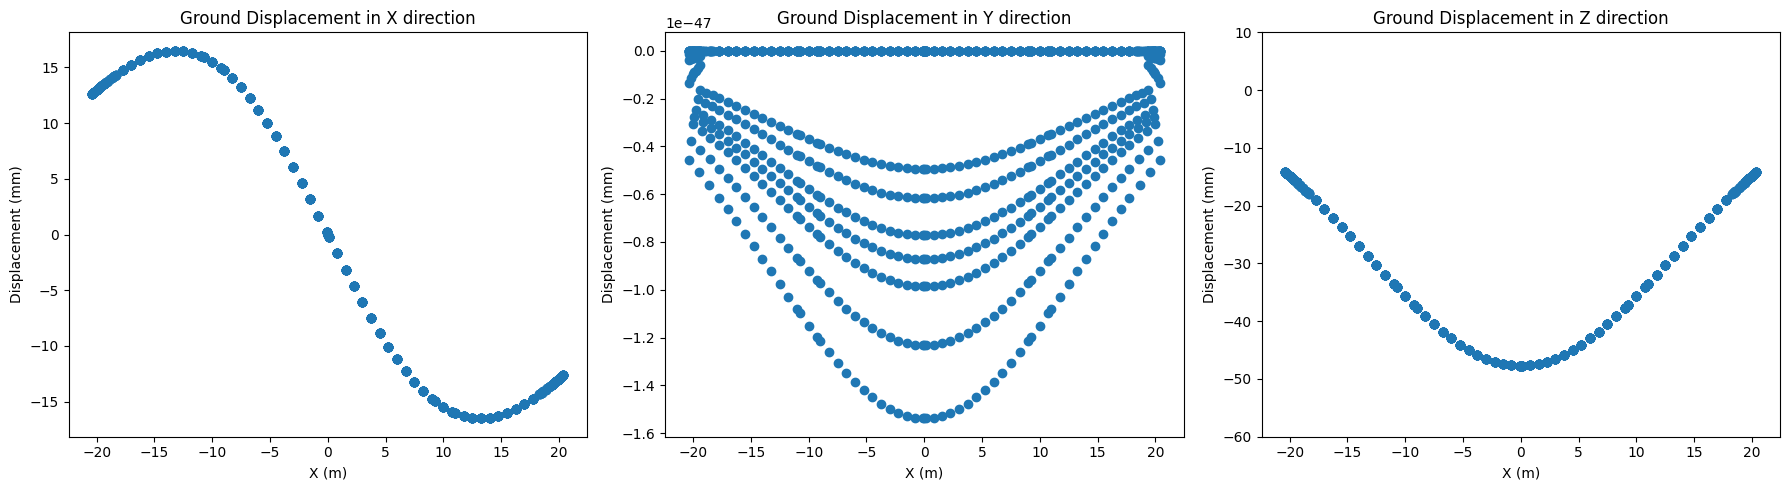

In [4]:
# Plot the ground displacements
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(x, u_x*1000)
axes[0].set_title("Ground Displacement in X direction")
axes[1].scatter(x, u_y*1000)
axes[1].set_title("Ground Displacement in Y direction")
axes[2].scatter(x, u_z*1000)
axes[2].set_title("Ground Displacement in Z direction")
axes[2].set_ylim([-60, 10])
for ax in axes:
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Displacement (mm)")
plt.tight_layout()

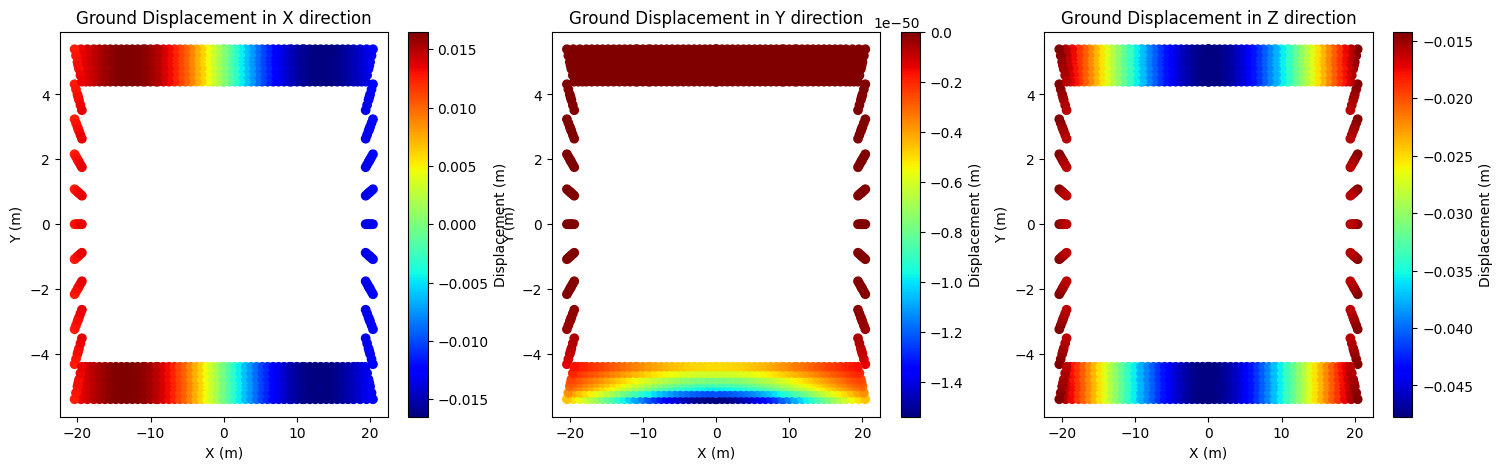

In [5]:
# Plot the ground displacements
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(x, y, c=u_x, cmap='jet')
axes[0].set_title("Ground Displacement in X direction")
axes[1].scatter(x, y, c=u_y, cmap='jet')
axes[1].set_title("Ground Displacement in Y direction")
axes[2].scatter(x, y, c=u_z, cmap='jet')
axes[2].set_title("Ground Displacement in Z direction")
# Add colorbar to each subplot
for ax in axes:
    cbar = plt.colorbar(ax.collections[0], ax=ax)
    cbar.set_label("Displacement (m)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")